# "Datamining project"
> "데이터마이닝 기말 프로젝트"

- toc:true
- branch: master
- badges: true
- comments: true
- author: EunSu Cho
- categories: [jupyter, python]

* [Chapter 1](#chapter1) 데이터 전처리
    * [Section 1.1](#section_1_1) S-DoT 유동인구 (20년 5월 4일~5월 31일)
    * [Section 1.2](#Section_1_2) S-DoT 유동인구 (22년 4월 18일~5월 15일)
* [Chapter 2](#chapter2) 데이터 시각화
    * [Section 2.1](#section_2_1) S-DoT 유동인구정보 설치 위치
    * [Section 2.2](#section_2_2) 서울시 공원 위치

출처: https://gmnam.tistory.com/246 [Voyager:티스토리]

코드 참고 출처
- https://teddylee777.github.io/visualization/folium


In [102]:
import numpy as np
import pandas as pd

import geopandas as gpd
import math

import requests
import json


import folium
from folium import Marker, GeoJson
from folium.plugins import HeatMap

import fiona
import pyproj
from fiona.crs import from_epsg

import seaborn as sns
sns.set()
sns.set(style="darkgrid")

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/SeoulHangangB.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
 

### Chapter 1 <a class="anchor" id="chapter1"></a> 데이터 전처리

In [103]:
sdot_1 = pd.read_csv("C:/Users/user/Desktop/S-DoT_WALK_2020.05.04-05.10.csv", encoding="cp949")
sdot_2 = pd.read_csv("C:/Users/user/Desktop/S-DoT_WALK_2020.05.11-05.17.csv", encoding="cp949")
sdot_3 = pd.read_csv("C:/Users/user/Desktop/S-DoT_WALK_2020.05.18-05.24.csv", encoding="cp949")
sdot_4 = pd.read_csv("C:/Users/user/Desktop/S-DoT_WALK_2020.05.25-05.31.csv", encoding="cp949")
# sdot_1.count() 37917
# sdot_2.count() 26191 
# sdot_3.count() 21056
# sdot_4.count() 41363
# 20년 5월 4일~5월 31일 약 한 달간의 데이터 총 126,527개
# 기관명 = 서울시, 방문자수, 날짜

In [104]:
sdot_6 = pd.read_csv("C:/Users/user/Desktop/S-DoT_WALK_2022.04.18-04.24.csv", encoding="cp949")
sdot_7 = pd.read_csv("C:/Users/user/Desktop/S-DoT_WALK_2022.04.25-05.01.csv", encoding="cp949")
sdot_8 = pd.read_csv("C:/Users/user/Desktop/S-DoT_WALK_2022.05.02-05.08.csv", encoding="cp949")
sdot_9 = pd.read_csv("C:/Users/user/Desktop/S-DoT_WALK_2022.05.09-05.15.csv", encoding="cp949")
# sdot_6.count() 70520
# sdot_7.count() 37478
# sdot_8.count() 84586
# sdot_4.count() 41363
# 22년 4월 18일~5월 15일 약 한 달간의 데이터 총 233,947개

#### Section 1.1 <a class="anchor" id="section_1_1"></a> S-DoT 유동인구 (20년 5월 4일~5월 31일)

In [52]:
## 20년 5월 4일~5월 31일
# 날짜 년-월-일-요일 분리

sdot_1['datetime'] = pd.to_datetime(sdot_1['등록일자'])
sdot_1['연도'] = sdot_1['datetime'].dt.year
sdot_1['월'] = sdot_1['datetime'].dt.month
sdot_1['일'] = sdot_1['datetime'].dt.day
sdot_1['요일'] = sdot_1['datetime'].dt.day_name()
sdot_1

,기관 명,모델명,시리얼,서버타입,사이트명,방문자수,날짜,등록일자,datetime,연도,월,일,요일
0,서울시,SDOT001,2992,00Original,2992,79,2.020050e+11,2020-05-04 0:06,2020-05-04 00:06:00,2020,5,4,Monday
1,서울시,SDOT001,2993,00Original,2993,77,2.020050e+11,2020-05-04 0:06,2020-05-04 00:06:00,2020,5,4,Monday
2,서울시,SDOT001,2994,00Original,2994,148,2.020050e+11,2020-05-04 0:06,2020-05-04 00:06:00,2020,5,4,Monday
3,서울시,SDOT001,2995,00Original,2995,62,2.020050e+11,2020-05-04 0:06,2020-05-04 00:06:00,2020,5,4,Monday
4,서울시,SDOT001,2996,00Original,2996,92,2.020050e+11,2020-05-04 0:06,2020-05-04 00:06:00,2020,5,4,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37912,서울시,SDOT001,3037,00Original,3037,00000000-1,2.020050e+11,2020-05-10 23:54,2020-05-10 23:54:00,2020,5,10,Sunday
37913,서울시,SDOT001,3038,00Original,3038,93,2.020050e+11,2020-05-10 23:54,2020-05-10 23:54:00,2020,5,10,Sunday
37914,서울시,SDOT001,3039,00Original,3039,89,2.020050e+11,2020-05-10 23:54,2020-05-10 23:54:00,2020,5,10,Sunday
37915,서울시,SDOT001,3040,00Original,3040,62,2.020050e+11,2020-05-10 23:54,2020-05-10 23:54:00,2020,5,10,Sunday


In [53]:
# 결측치 제거

sdot_1_del = sdot_1[sdot_1['방문자수'] == '00000000-1'].index
sdot_1_del
sdot_1.drop(sdot_1_del, axis='index', inplace=True)

sdot_1_del2 = sdot_1[sdot_1['방문자수'] == '00000000-2'].index
sdot_1_del2
sdot_1.drop(sdot_1_del2, axis='index', inplace=True)

In [54]:
# '일' 기준으로 방문자수 확인

sdot_1["방문자수"].head()
sdot_1 = sdot_1.astype({'방문자수':'int'})
pd.pivot_table(data = sdot_1, index = '일', values='방문자수', aggfunc= 'count')

,방문자수
일,
4,5130
5,4997
6,5257
7,4761
8,2671
9,5125
10,5035


<AxesSubplot:xlabel='요일', ylabel='방문자수'>

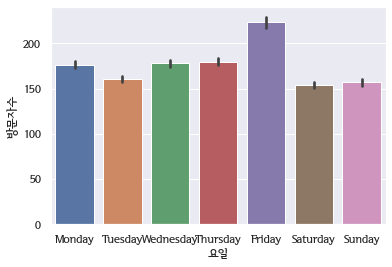

In [55]:
sns.barplot(x="요일", y="방문자수", data=sdot_1) # 금요일에 방문자수 가장 많음

<AxesSubplot:xlabel='일'>

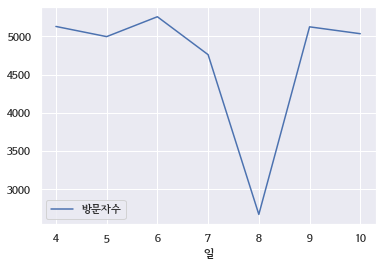

In [68]:
pd.pivot_table(data = sdot_1, index = '일', values='방문자수', aggfunc= 'count').plot()
# 5월 6일에 방문자수 최대치
# 5월 8일에 가장 방문자수가 낮고 6일에 방문자수가 높음

In [62]:
# 날짜 년-월-일-요일 분리

sdot_2['datetime'] = pd.to_datetime(sdot_2['등록일자'])
sdot_2['연도'] = sdot_2['datetime'].dt.year
sdot_2['월'] = sdot_2['datetime'].dt.month
sdot_2['일'] = sdot_2['datetime'].dt.day
sdot_2['요일'] = sdot_2['datetime'].dt.day_name()
sdot_2

,기관 명,모델명,시리얼,서버타입,사이트명,방문자수,날짜,등록일자,datetime,연도,월,일,요일
0,서울시,SDOT001,2992,00Original,2992,74,2.020050e+11,2020-05-11 0:04,2020-05-11 00:04:00,2020,5,11,Monday
1,서울시,SDOT001,2993,00Original,2993,67,2.020050e+11,2020-05-11 0:04,2020-05-11 00:04:00,2020,5,11,Monday
2,서울시,SDOT001,2994,00Original,2994,185,2.020050e+11,2020-05-11 0:05,2020-05-11 00:05:00,2020,5,11,Monday
3,서울시,SDOT001,2995,00Original,2995,58,2.020050e+11,2020-05-11 0:05,2020-05-11 00:05:00,2020,5,11,Monday
4,서울시,SDOT001,2996,00Original,2996,63,2.020050e+11,2020-05-11 0:05,2020-05-11 00:05:00,2020,5,11,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26186,서울시,SDOT001,3004,00Original,3004,74,2.020050e+11,2020-05-17 23:50,2020-05-17 23:50:00,2020,5,17,Sunday
26187,서울시,SDOT001,3005,00Original,3005,117,2.020050e+11,2020-05-17 23:52,2020-05-17 23:52:00,2020,5,17,Sunday
26188,서울시,SDOT001,3006,00Original,3006,116,2.020050e+11,2020-05-17 23:54,2020-05-17 23:54:00,2020,5,17,Sunday
26189,서울시,SDOT001,3007,00Original,3007,103,2.020050e+11,2020-05-17 23:57,2020-05-17 23:57:00,2020,5,17,Sunday


In [63]:
# 결측치 제거

sdot_2_del = sdot_2[sdot_2['방문자수'] == '00000000-1'].index
sdot_2_del
sdot_2.drop(sdot_2_del, axis='index', inplace=True)

sdot_2_del2 = sdot_2[sdot_2['방문자수'] == '00000000-2'].index
sdot_2_del2
sdot_2.drop(sdot_2_del2, axis='index', inplace=True)

In [64]:
# '일'기준으로 방문자수 확인

sdot_2["방문자수"].head()
sdot_2 = sdot_2.astype({'방문자수':'int'})
pd.pivot_table(data = sdot_2, index = '일', values='방문자수', aggfunc= 'count')

,방문자수
일,
11,5102
12,4500
13,4489
14,4525
15,2988
16,491
17,508


<AxesSubplot:xlabel='요일', ylabel='방문자수'>

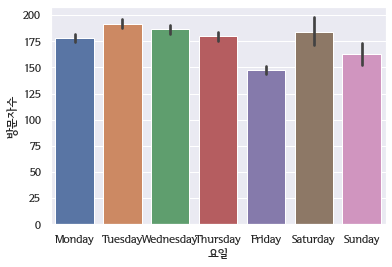

In [65]:
sns.barplot(x="요일", y="방문자수", data=sdot_2) # 화요일에 방문자수가 가장 많음

<AxesSubplot:xlabel='일'>

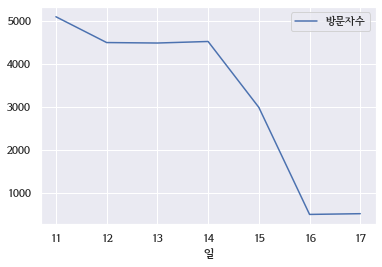

In [87]:
pd.pivot_table(data = sdot_2, index = '일', values='방문자수', aggfunc= 'count').plot()
# 5월 11일 방문자수, 코로나 확진자 수 비례

In [72]:
# 날짜 년-월-일-요일 분리

sdot_3['datetime'] = pd.to_datetime(sdot_3['등록일자'])
sdot_3['연도'] = sdot_3['datetime'].dt.year
sdot_3['월'] = sdot_3['datetime'].dt.month
sdot_3['일'] = sdot_3['datetime'].dt.day
sdot_3['요일'] = sdot_3['datetime'].dt.day_name()
sdot_3

,기관 명,모델명,시리얼,서버타입,사이트명,방문자수,날짜,등록일자,datetime,연도,월,일,요일
0,서울시,SDOT001,3009,00Original,3009,105,2.020050e+11,2020-05-18 0:02,2020-05-18 00:02:00,2020,5,18,Monday
1,서울시,SDOT001,3010,00Original,3010,98,2.020050e+11,2020-05-18 0:04,2020-05-18 00:04:00,2020,5,18,Monday
2,서울시,SDOT001,3011,00Original,3011,203,2.020050e+11,2020-05-18 0:07,2020-05-18 00:07:00,2020,5,18,Monday
3,서울시,SDOT001,3012,00Original,3012,70,2.020050e+11,2020-05-18 0:09,2020-05-18 00:09:00,2020,5,18,Monday
4,서울시,SDOT001,3013,00Original,3013,89,2.020050e+11,2020-05-18 0:11,2020-05-18 00:11:00,2020,5,18,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21051,서울시,SDOT001,3037,00Original,3037,00000000-1,2.020050e+11,2020-05-24 23:59,2020-05-24 23:59:00,2020,5,24,Sunday
21052,서울시,SDOT001,3038,00Original,3038,79,2.020050e+11,2020-05-24 23:59,2020-05-24 23:59:00,2020,5,24,Sunday
21053,서울시,SDOT001,3039,00Original,3039,75,2.020050e+11,2020-05-24 23:59,2020-05-24 23:59:00,2020,5,24,Sunday
21054,서울시,SDOT001,3040,00Original,3040,77,2.020050e+11,2020-05-24 23:59,2020-05-24 23:59:00,2020,5,24,Sunday


In [73]:
# 결측치 제거

sdot_3_del = sdot_3[sdot_3['방문자수'] == '00000000-1'].index
sdot_3_del
sdot_3.drop(sdot_3_del, axis='index', inplace=True)

sdot_3_del2 = sdot_3[sdot_3['방문자수'] == '00000000-2'].index
sdot_3_del2
sdot_3.drop(sdot_3_del2, axis='index', inplace=True)

In [74]:
# '일' 기준으로 방문자수 확인

sdot_3["방문자수"].head()
sdot_3 = sdot_3.astype({'방문자수':'int'})
pd.pivot_table(data = sdot_3, index = '일', values='방문자수', aggfunc= 'count')

,방문자수
일,
18,515
19,495
20,550
21,1666
22,4443
23,4114
24,4425


<AxesSubplot:xlabel='요일', ylabel='방문자수'>

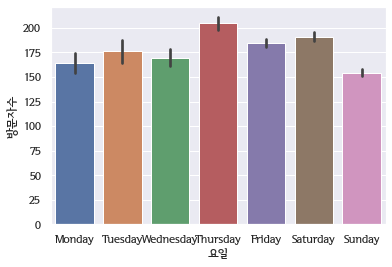

In [79]:
sns.barplot(x="요일", y="방문자수", data=sdot_3) # 목요일에 방문자수 가장 많음

<AxesSubplot:xlabel='일'>

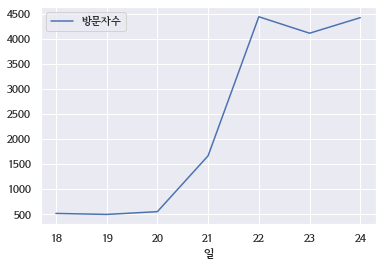

In [80]:
pd.pivot_table(data = sdot_3, index = '일', values='방문자수', aggfunc= 'count').plot()

In [81]:
# 날짜 년-월-일-요일 분리

sdot_4['datetime'] = pd.to_datetime(sdot_4['등록일자'])
sdot_4['연도'] = sdot_4['datetime'].dt.year
sdot_4['월'] = sdot_4['datetime'].dt.month
sdot_4['일'] = sdot_4['datetime'].dt.day
sdot_4['요일'] = sdot_4['datetime'].dt.day_name()
sdot_4

,기관 명,모델명,시리얼,서버타입,사이트명,방문자수,날짜,등록일자,datetime,연도,월,일,요일
0,서울시,SDOT001,2992,00Original,2992,84,2.020050e+11,2020-05-25 0:01,2020-05-25 00:01:00,2020,5,25,Monday
1,서울시,SDOT001,2993,00Original,2993,78,2.020050e+11,2020-05-25 0:01,2020-05-25 00:01:00,2020,5,25,Monday
2,서울시,SDOT001,2994,00Original,2994,122,2.020050e+11,2020-05-25 0:01,2020-05-25 00:01:00,2020,5,25,Monday
3,서울시,SDOT001,2995,00Original,2995,88,2.020050e+11,2020-05-25 0:01,2020-05-25 00:01:00,2020,5,25,Monday
4,서울시,SDOT001,2996,00Original,2996,90,2.020050e+11,2020-05-25 0:01,2020-05-25 00:01:00,2020,5,25,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41358,서울시,SDOT001,3037,00Original,3037,00000000-1,2.020050e+11,2020-05-31 23:58,2020-05-31 23:58:00,2020,5,31,Sunday
41359,서울시,SDOT001,3038,00Original,3038,104,2.020050e+11,2020-05-31 23:58,2020-05-31 23:58:00,2020,5,31,Sunday
41360,서울시,SDOT001,3039,00Original,3039,78,2.020050e+11,2020-05-31 23:58,2020-05-31 23:58:00,2020,5,31,Sunday
41361,서울시,SDOT001,3040,00Original,3040,66,2.020050e+11,2020-05-31 23:58,2020-05-31 23:58:00,2020,5,31,Sunday


In [82]:
# 결측치 제거

sdot_4_del = sdot_4[sdot_4['방문자수'] == '00000000-1'].index
sdot_4_del
sdot_4.drop(sdot_4_del, axis='index', inplace=True)

sdot_4_del2 = sdot_4[sdot_4['방문자수'] == '00000000-2'].index
sdot_4_del2
sdot_4.drop(sdot_4_del2, axis='index', inplace=True)

In [83]:
# '일' 기준으로 방문자수 확인

sdot_4["방문자수"].head()
sdot_4 = sdot_4.astype({'방문자수':'int'})
pd.pivot_table(data = sdot_4, index = '일', values='방문자수', aggfunc= 'count')

,방문자수
일,
25,4427
26,4428
27,4449
28,4426
29,4443
30,4405
31,4432


<AxesSubplot:xlabel='요일', ylabel='방문자수'>

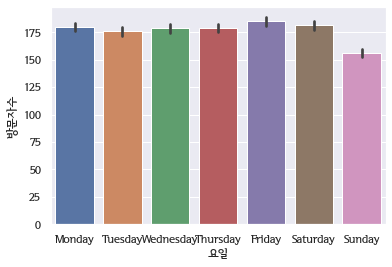

In [84]:
sns.barplot(x="요일", y="방문자수", data=sdot_4) # 금요일에 방문자수 가장 많음
# 전체적으로 방문자수 평균이 고르게 나옴

<AxesSubplot:xlabel='일'>

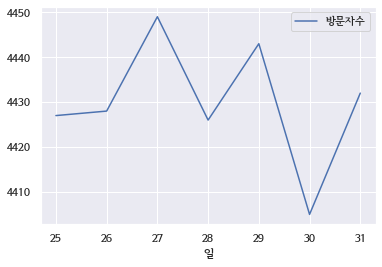

In [85]:
pd.pivot_table(data = sdot_4, index = '일', values='방문자수', aggfunc= 'count').plot()
# 5월 27일 방문자수, 확진자수 비례함

#### Section 1.2 <a class="anchor" id="section_1_2"></a>  S-DoT 유동인구 (22년 4월 18일~5월 15일)

In [105]:
## 22년 4월 18일~5월 15일
# 날짜 년-월-일-요일 분리

sdot_6['datetime'] = pd.to_datetime(sdot_6['방문자수'])
sdot_6['연도'] = sdot_6['datetime'].dt.year
sdot_6['월'] = sdot_6['datetime'].dt.month
sdot_6['일'] = sdot_6['datetime'].dt.day
sdot_6['요일'] = sdot_6['datetime'].dt.day_name()
sdot_6

기관 명         모델명   시리얼  서버타입          사이트명                 방문자수  \
서울시 SDOT001  4033  00Original  4033     7  202204170000  2022-04-18 00:00:06   
    SDOT001  4041  00Original  4041     0  202204170000  2022-04-18 00:00:11   
    SDOT001  4027  00Original  4027    13  202204170000  2022-04-18 00:00:11   
    SDOT001  4015  00Original  4015     3  202204170000  2022-04-18 00:00:16   
    SDOT001  2993  00Original  2993   230  202204172340  2022-04-18 00:00:20   
...           ...         ...   ...   ...           ...                  ...   
    SDOT001  3038  00Original  3038   249  202204242350  2022-04-24 23:57:55   
    SDOT001  3037  00Original  3037   154  202204242350  2022-04-24 23:57:55   
    SDOT001  3039  00Original  3039   218  202204242350  2022-04-24 23:57:55   
    SDOT001  3041  00Original  3041   209  202204242350  2022-04-24 23:57:56   
    SDOT001  3040  00Original  3040   266  202204242350  2022-04-24 23:57:56   

             날짜  등록일자            datetime    연도  월   일      요일  
서울시 SDOT001 NaN   NaN 2022-04-18 00:00:06  2022  4  18  Monday  
    SDOT001 NaN   NaN 2022-04-18 00:00:11  2022  4  18  Monday  
    SDOT001 NaN   NaN 2022-04-18 00:00:11  2022  4  18  Monday  
    SDOT001 NaN   NaN 2022-04-18 00:00:16  2022  4  18  Monday  
    SDOT001 NaN   NaN 2022-04-18 00:00:20  2022  4  18  Monday  
...          ..   ...                 ...   ... ..  ..     ...  
    SDOT001 NaN   NaN 2022-04-24 23:57:55  2022  4  24  Sunday  
    SDOT001 NaN   NaN 2022-04-24 23:57:55  2022  4  24  Sunday  
    SDOT001 NaN   NaN 2022-04-24 23:57:55  2022  4  24  Sunday  
    SDOT001 NaN   NaN 2022-04-24 23:57:56  2022  4  24  Sunday  
    SDOT001 NaN   NaN 2022-04-24 23:57:56  2022  4  24  Sunday  

[70520 rows x 13 columns]

In [106]:
# '일' 기준으로 방문자수 확인

sdot_6["방문자수"].head()
sdot_6 = sdot_6.astype({'서버타입':'int'})
pd.pivot_table(data = sdot_6, index = '일', values='서버타입', aggfunc= 'count')

,서버타입
일,
18,12111
19,12427
20,12484
21,8407
22,6199
23,7394
24,11498


<AxesSubplot:xlabel='일'>

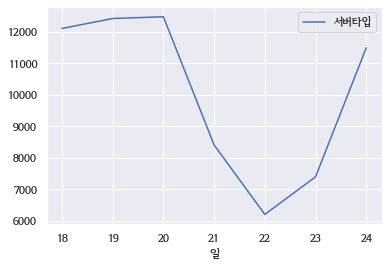

In [115]:
pd.pivot_table(data = sdot_6, index = '일', values='서버타입', aggfunc= 'count').plot()

In [117]:
# 날짜 년-월-일-요일 분리

sdot_7['datetime'] = pd.to_datetime(sdot_7['방문자수'])
sdot_7['연도'] = sdot_7['datetime'].dt.year
sdot_7['월'] = sdot_7['datetime'].dt.month
sdot_7['일'] = sdot_7['datetime'].dt.day
sdot_7['요일'] = sdot_7['datetime'].dt.day_name()
sdot_7

기관 명         모델명   시리얼  서버타입          사이트명                 방문자수  \
서울시 SDOT001  4027  00Original  4027    12  202204240000  2022-04-25 00:00:02   
    SDOT001  4033  00Original  4033    13  202204240000  2022-04-25 00:00:07   
    SDOT001  4041  00Original  4041     1  202204240000  2022-04-25 00:00:12   
    SDOT001  4015  00Original  4015    14  202204240000  2022-04-25 00:00:16   
    SDOT001  4031  00Original  4031     2  202204240000  2022-04-25 00:00:21   
...           ...         ...   ...   ...           ...                  ...   
    SDOT001  4030  00Original  4030     4  202205012350  2022-05-01 23:57:23   
    SDOT001  4007  00Original  4007     4  202205012350  2022-05-01 23:57:29   
    SDOT001  4040  00Original  4040    27  202205012350  2022-05-01 23:57:43   
    SDOT001  4042  00Original  4042     4  202205012350  2022-05-01 23:57:47   
    SDOT001  4025  00Original  4025     3  202205012350  2022-05-01 23:57:52   

             날짜  등록일자            datetime    연도  월   일      요일  
서울시 SDOT001 NaN   NaN 2022-04-25 00:00:02  2022  4  25  Monday  
    SDOT001 NaN   NaN 2022-04-25 00:00:07  2022  4  25  Monday  
    SDOT001 NaN   NaN 2022-04-25 00:00:12  2022  4  25  Monday  
    SDOT001 NaN   NaN 2022-04-25 00:00:16  2022  4  25  Monday  
    SDOT001 NaN   NaN 2022-04-25 00:00:21  2022  4  25  Monday  
...          ..   ...                 ...   ... ..  ..     ...  
    SDOT001 NaN   NaN 2022-05-01 23:57:23  2022  5   1  Sunday  
    SDOT001 NaN   NaN 2022-05-01 23:57:29  2022  5   1  Sunday  
    SDOT001 NaN   NaN 2022-05-01 23:57:43  2022  5   1  Sunday  
    SDOT001 NaN   NaN 2022-05-01 23:57:47  2022  5   1  Sunday  
    SDOT001 NaN   NaN 2022-05-01 23:57:52  2022  5   1  Sunday  

[37478 rows x 13 columns]

In [118]:
# '일' 기준으로 방문자수 확인

sdot_7["방문자수"].head()
sdot_7 = sdot_7.astype({'서버타입':'int'})
pd.pivot_table(data = sdot_7, index = '일', values='서버타입', aggfunc= 'count')

,서버타입
일,
1,10967
25,8082
26,5740
27,12689


<AxesSubplot:xlabel='일'>

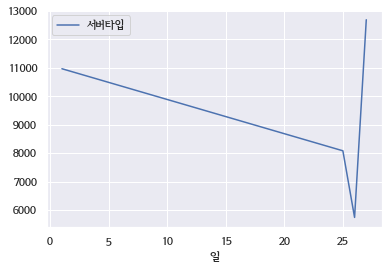

In [119]:
pd.pivot_table(data = sdot_7, index = '일', values='서버타입', aggfunc= 'count').plot()

In [120]:
# 날짜 년-월-일-요일 분리

sdot_8['datetime'] = pd.to_datetime(sdot_8['방문자수'])
sdot_8['연도'] = sdot_8['datetime'].dt.year
sdot_8['월'] = sdot_8['datetime'].dt.month
sdot_8['일'] = sdot_8['datetime'].dt.day
sdot_8['요일'] = sdot_8['datetime'].dt.day_name()
sdot_8

기관 명         모델명   시리얼  서버타입          사이트명                 방문자수  \
서울시 SDOT001  4027  00Original  4027    11  202205010000  2022-05-02 00:00:03   
    SDOT001  4033  00Original  4033     6  202205010000  2022-05-02 00:00:06   
    SDOT001  4041  00Original  4041     2  202205010000  2022-05-02 00:00:12   
    SDOT001  4015  00Original  4015     8  202205010000  2022-05-02 00:00:16   
    SDOT001  4031  00Original  4031     1  202205010000  2022-05-02 00:00:22   
...           ...         ...   ...   ...           ...                  ...   
    SDOT001  4029  00Original  4029     3  202205082350  2022-05-08 23:56:59   
    SDOT001  4030  00Original  4030     0  202205082350  2022-05-08 23:57:23   
    SDOT001  4007  00Original  4007     0  202205082350  2022-05-08 23:57:28   
    SDOT001  4040  00Original  4040     3  202205082350  2022-05-08 23:57:43   
    SDOT001  4042  00Original  4042     4  202205082350  2022-05-08 23:57:48   

             날짜  등록일자            datetime    연도  월  일      요일  
서울시 SDOT001 NaN   NaN 2022-05-02 00:00:03  2022  5  2  Monday  
    SDOT001 NaN   NaN 2022-05-02 00:00:06  2022  5  2  Monday  
    SDOT001 NaN   NaN 2022-05-02 00:00:12  2022  5  2  Monday  
    SDOT001 NaN   NaN 2022-05-02 00:00:16  2022  5  2  Monday  
    SDOT001 NaN   NaN 2022-05-02 00:00:22  2022  5  2  Monday  
...          ..   ...                 ...   ... .. ..     ...  
    SDOT001 NaN   NaN 2022-05-08 23:56:59  2022  5  8  Sunday  
    SDOT001 NaN   NaN 2022-05-08 23:57:23  2022  5  8  Sunday  
    SDOT001 NaN   NaN 2022-05-08 23:57:28  2022  5  8  Sunday  
    SDOT001 NaN   NaN 2022-05-08 23:57:43  2022  5  8  Sunday  
    SDOT001 NaN   NaN 2022-05-08 23:57:48  2022  5  8  Sunday  

[84586 rows x 13 columns]

In [121]:
# '일' 기준으로 방문자수 확인

sdot_8["방문자수"].head()
sdot_8 = sdot_8.astype({'서버타입':'int'})
pd.pivot_table(data = sdot_8, index = '일', values='서버타입', aggfunc= 'count')

,서버타입
일,
2,12091
3,11996
4,10284
5,12798
6,12561
7,12609
8,12247


<AxesSubplot:xlabel='일'>

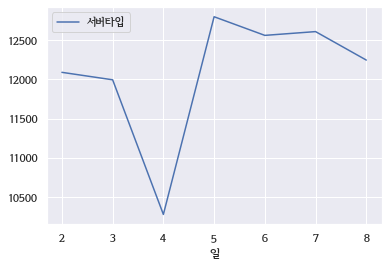

In [122]:
pd.pivot_table(data = sdot_8, index = '일', values='서버타입', aggfunc= 'count').plot()

In [123]:
# 날짜 년-월-일-요일 분리

sdot_9['datetime'] = pd.to_datetime(sdot_9['방문자수'])
sdot_9['연도'] = sdot_9['datetime'].dt.year
sdot_9['월'] = sdot_9['datetime'].dt.month
sdot_9['일'] = sdot_9['datetime'].dt.day
sdot_9['요일'] = sdot_9['datetime'].dt.day_name()
sdot_9

기관 명         모델명   시리얼  서버타입          사이트명                 방문자수  \
서울시 SDOT001  4027  00Original  4027    13  202205080000  2022-05-09 00:00:02   
    SDOT001  4033  00Original  4033     7  202205080000  2022-05-09 00:00:06   
    SDOT001  4041  00Original  4041     1  202205080000  2022-05-09 00:00:12   
    SDOT001  4015  00Original  4015     7  202205080000  2022-05-09 00:00:16   
    SDOT001  4031  00Original  4031     2  202205080000  2022-05-09 00:00:22   
...           ...         ...   ...   ...           ...                  ...   
    SDOT001  4006  00Original  4006     2  202205150540  2022-05-15 23:59:44   
    SDOT001  4009  00Original  4009    18  202205150600  2022-05-15 23:59:44   
    SDOT001  4015  00Original  4015     5  202205150530  2022-05-15 23:59:44   
    SDOT001  4040  00Original  4040     4  202205150550  2022-05-15 23:59:44   
    SDOT001  4023  00Original  4023     5  202205150530  2022-05-15 23:59:52   

             날짜  등록일자            datetime    연도  월   일      요일  
서울시 SDOT001 NaN   NaN 2022-05-09 00:00:02  2022  5   9  Monday  
    SDOT001 NaN   NaN 2022-05-09 00:00:06  2022  5   9  Monday  
    SDOT001 NaN   NaN 2022-05-09 00:00:12  2022  5   9  Monday  
    SDOT001 NaN   NaN 2022-05-09 00:00:16  2022  5   9  Monday  
    SDOT001 NaN   NaN 2022-05-09 00:00:22  2022  5   9  Monday  
...          ..   ...                 ...   ... ..  ..     ...  
    SDOT001 NaN   NaN 2022-05-15 23:59:44  2022  5  15  Sunday  
    SDOT001 NaN   NaN 2022-05-15 23:59:44  2022  5  15  Sunday  
    SDOT001 NaN   NaN 2022-05-15 23:59:44  2022  5  15  Sunday  
    SDOT001 NaN   NaN 2022-05-15 23:59:44  2022  5  15  Sunday  
    SDOT001 NaN   NaN 2022-05-15 23:59:52  2022  5  15  Sunday  

[110858 rows x 13 columns]

In [124]:
# '일' 기준으로 방문자수 확인

sdot_9["방문자수"].head()
sdot_9 = sdot_9.astype({'서버타입':'int'})
pd.pivot_table(data = sdot_9, index = '일', values='서버타입', aggfunc= 'count')

,서버타입
일,
9,12425
10,12495
11,12573
12,12409
13,12405
14,16986
15,31565


<AxesSubplot:xlabel='일'>

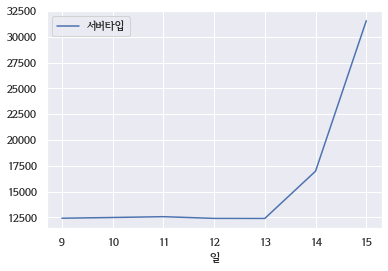

In [125]:
pd.pivot_table(data = sdot_9, index = '일', values='서버타입', aggfunc= 'count').plot()

### Chapter 2 <a class="anchor" id="chapter2"></a> 데이터 시각화

In [38]:
# s-dot 유동인구정보 설치 위치 데이터

df = pd.read_excel('C:/Users/user/Desktop/(공개용)도시데이터센서(S-DoT) 유동인구정보 설치 위치정보_220314.xlsx')
df1 = df.drop(index=[0, 1, 5]) # 임시철거와 서울 경계에 벗어난 위치 제거
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 2 to 100
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   순번      98 non-null     int64  
 1   시리얼번호   98 non-null     object 
 2   사이트명    98 non-null     int64  
 3   자치구     98 non-null     object 
 4   주소      98 non-null     object 
 5   구분      98 non-null     object 
 6   높이      98 non-null     float64
 7   위도      98 non-null     float64
 8   경도      98 non-null     float64
 9   측정방식    98 non-null     object 
 10  비고      0 non-null      object 
dtypes: float64(3), int64(2), object(6)
memory usage: 9.2+ KB


In [39]:
# df1의 geometry 생성

geom_1 = gpd.points_from_xy(df1['위도'], df1['경도'])
geom_1 = gpd.GeoDataFrame(geometry=geom_1, crs=from_epsg(4326))
geom_1.head()

,geometry
0,POINT (37.544 127.070)
1,POINT (37.583 126.983)
2,POINT (37.564 126.985)
3,POINT (37.526 127.039)
4,POINT (37.524 127.129)


In [40]:
# 서울 행정구역 json raw파일(githubcontent)

r = requests.get('https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json')
c = r.content
seoul_geo = json.loads(c)

In [41]:
# 서울 '시청' 기준으로 좌표 지정
# 위도
latitude = 37.5666805
# 경도
longitude = 126.9784147

##### Section 2.1 <a class="anchor" id="section_2_1"></a> S-DoT 유동인구정보 설치 위치

In [42]:
# s-dot 유동인구정보 설치된 곳 좌표찍기

m_1 = folium.Map(
    location=[latitude, longitude],
    zoom_start=11, 
    tiles='cartodbpositron')

folium.GeoJson(
    seoul_geo,
    name='서울 지역구').add_to(m_1)

m_1

for idx, row in df1.iterrows():
    Marker([row['위도'], row['경도']], icon=folium.Icon('purple', icon='ok')).add_to(m_1)

m_1


In [43]:
# 서울시 주요 공원 데이터

df2 = pd.read_csv('C:/Users/user/Desktop/서울시 주요 공원현황.csv', encoding= 'cp949')
df2.dropna(subset=['X좌표(WGS84)', 'Y좌표(WGS84)'], inplace=True)
df2 = df2.drop(index=[2]) # 서울 경계에 벗어난 위치 제거
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130 entries, 0 to 130
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   연번            130 non-null    int64  
 1   공원명           130 non-null    object 
 2   공원개요          129 non-null    object 
 3   면적            128 non-null    object 
 4   개원일           121 non-null    object 
 5   주요시설          123 non-null    object 
 6   주요식물          88 non-null     object 
 7   안내도           102 non-null    object 
 8   오시는길          113 non-null    object 
 9   이용시참고사항       119 non-null    object 
 10  이미지           130 non-null    object 
 11  지역            129 non-null    object 
 12  공원주소          130 non-null    object 
 13  관리부서          130 non-null    object 
 14  전화번호          130 non-null    object 
 15  X좌표(GRS80TM)  121 non-null    float64
 16  Y좌표(GRS80TM)  121 non-null    float64
 17  X좌표(WGS84)    130 non-null    float64
 18  Y좌표(WGS84)    130 non-null    

In [44]:
# df2의 geometry 생성

geom_2 = gpd.points_from_xy(df2['X좌표(WGS84)'], df2['Y좌표(WGS84)'])
geom_2 [0:3]

geom_2 = gpd.GeoDataFrame(geometry=geom_2, crs=from_epsg(4326))
geom_2.head()

,geometry
0,POINT (126.99038 37.55014)
1,POINT (127.15478 37.54039)
2,POINT (127.04180 37.54307)
3,POINT (126.87891 37.57180)
4,POINT (126.97802 37.57504)


#### Section 2.2 <a class="anchor" id="section_2_2"></a> 서울시 공원 위치

In [45]:
# 서울시 공원 좌표 찍기

m_2 = folium.Map(
    location=[latitude, longitude],
    zoom_start=11, 
    tiles='cartodbpositron')

folium.GeoJson(
    seoul_geo,
    name='서울 지역구').add_to(m_2)

m_2

for idx, row in df2.iterrows():
    Marker([row['Y좌표(WGS84)'], row['X좌표(WGS84)']]).add_to(m_2)

m_2

In [46]:
# s-dot 유동인구정보 설치 위치 + 서울시 공원 위치(버퍼)
m = folium.Map(location=[latitude, longitude], zoom_start=11, tiles='cartodbpositron')

folium.GeoJson(
    seoul_geo,
    name='서울 지역구').add_to(m)

HeatMap(data=df2[['Y좌표(WGS84)', 'X좌표(WGS84)']], radius=50).add_to(m)

for idx, row in df2.iterrows():
    Marker([row['Y좌표(WGS84)'], row['X좌표(WGS84)']]).add_to(m)

GeoJson(geom_2.to_crs(epsg=4326)).add_to(m)

for idx, row in df1.iterrows():
    Marker([row['위도'], row['경도']], icon=folium.Icon('purple', icon='ok')).add_to(m)

m

c:\Users\user\anaconda3\lib\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
